In [79]:
from numpy import * 
from pandas import * 
from scipy import stats
from sklearn import preprocessing
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
random.seed(0)

In [80]:
df_train = read_csv ("../input/housing/train.csv")
df_test = read_csv ("../input/testsss/test.csv")

In [81]:
df_train.drop(['Id'], axis =1 , inplace = True)

In [82]:
test_ID = df_test['Id']

In [83]:
df_test.drop(['Id'], axis =1 , inplace = True)

In [84]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


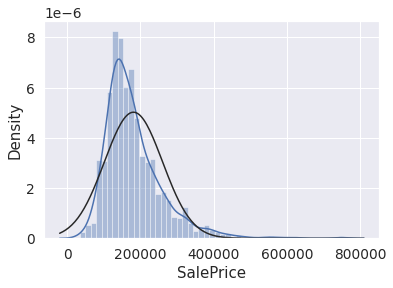

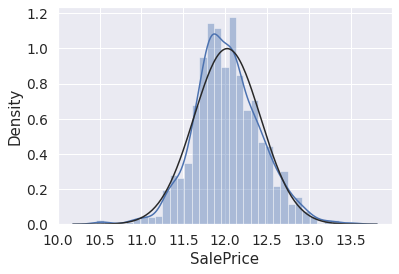

In [85]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
df_train["SalePrice"] = log1p(df_train["SalePrice"])
sns.distplot(df_train['SalePrice'] , fit=norm);

In [86]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
df = concat([df_train, df_test])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [87]:
print(ntest)

1459


In [88]:
total_test = df.isnull().sum().sort_values(ascending=False)
percent_test = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data_test = concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(50)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471


In [89]:
#df=df[df.columns[df.isna().sum()/df.shape[0] <0.8]]
#df.head()


In [90]:
total_test = df.isnull().sum().sort_values(ascending=False)
percent_test = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data_test = concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(50)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471


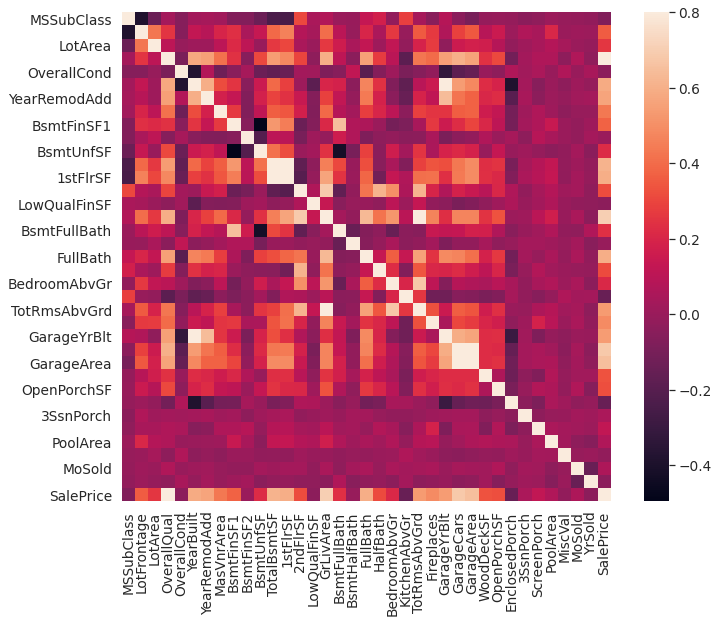

In [91]:

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);



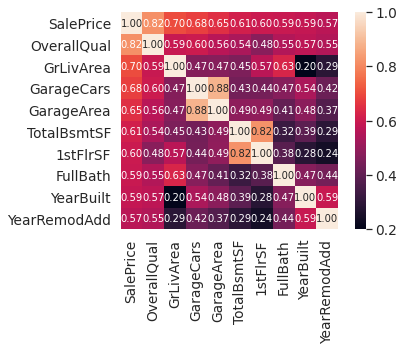

In [92]:

k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()




In [93]:
#y_scaled = StandardScaler().fit_transform(df['SalePrice'][:newaxis]);
#low_range = y_scaled[y_scaled[:,0].argsort()][:10]
#high_range= y_scaled[y_scaled[:,0].argsort()][-10:]

In [94]:
df = df.drop(df[df['LotArea']>80000].index)

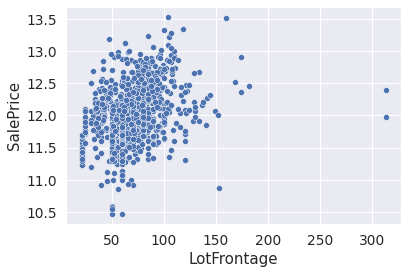

In [95]:
sns.scatterplot(x=df.LotFrontage,y=df.SalePrice);

In [96]:
df = df.drop(df[df['LotFrontage']>300].index)

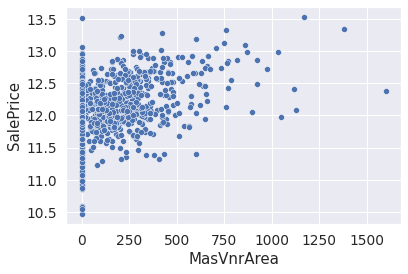

In [97]:
sns.scatterplot(x=df.MasVnrArea,y=df.SalePrice);

In [98]:
df = df.drop(df[df['MasVnrArea']>1250].index)

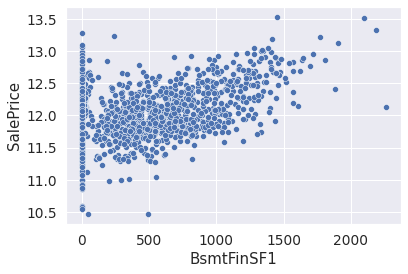

In [99]:
sns.scatterplot(x=df.BsmtFinSF1,y=df.SalePrice);

In [100]:
df = df.drop(df[df['BsmtFinSF1']>2000].index)

In [101]:
df.to_csv('mycsvfile.csv',index=False)

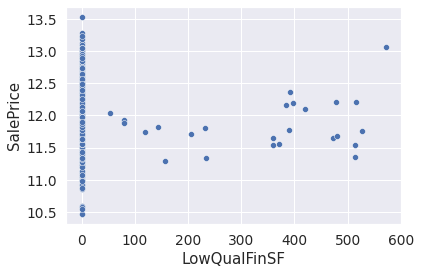

In [102]:
sns.scatterplot(x=df.LowQualFinSF,y=df.SalePrice);

In [103]:
df = df.drop(df[df['LowQualFinSF']>700].index)

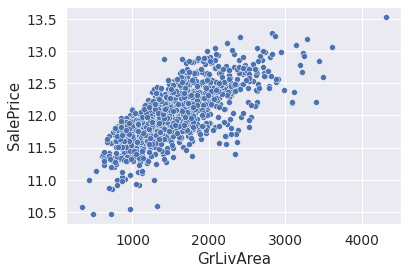

In [104]:
sns.scatterplot(x=df.GrLivArea,y=df.SalePrice);

In [105]:
df = df.drop(df[df['GrLivArea']>4000].index)

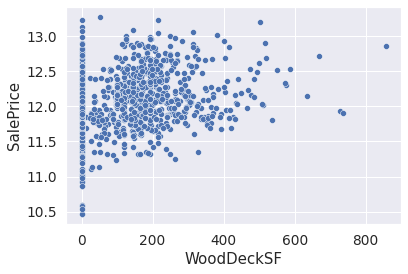

In [106]:
sns.scatterplot(x=df.WoodDeckSF,y=df.SalePrice);

In [107]:
df = df.drop(df[df['WoodDeckSF']>800].index)

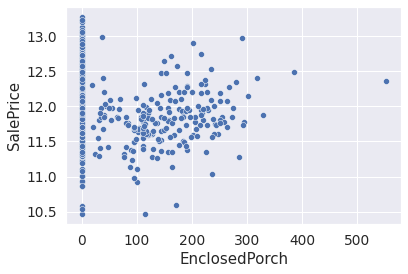

In [108]:
sns.scatterplot(x=df.EnclosedPorch,y=df.SalePrice);

In [109]:
df = df.drop(df[df['EnclosedPorch']>600].index)

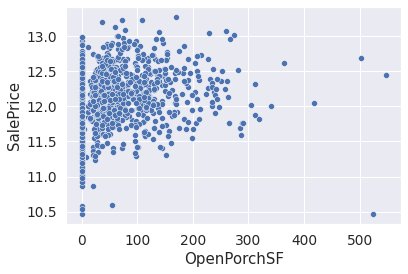

In [110]:
sns.scatterplot(x=df.OpenPorchSF,y=df.SalePrice);

In [111]:
df = df.drop(df[df['OpenPorchSF']>600].index)

In [112]:
df = df.drop(df[df['3SsnPorch']>410].index)

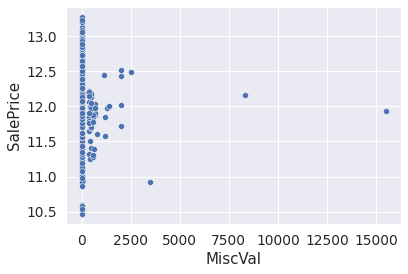

In [113]:
sns.scatterplot(x=df.MiscVal,y=df.SalePrice);

In [114]:
df = df.drop(df[df['MiscVal']>8500].index)

In [115]:
df = df.drop(df[df['SalePrice']>600000].index)

In [116]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [117]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns
df_num = df[numerical_features]
df_cat = df[categorical_features]

In [118]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [119]:
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [120]:
for col in (df_cat.columns):
    df[col] = df[col].fillna('None')

In [121]:
for col in (df_num.columns):
    df[col] = df[col].fillna(0)

In [122]:
## Getting all the skewed features (skew > 0.5 or skew < -0.5)
skewed_features = df[numerical_features].skew()[abs(df[numerical_features].skew()) > 0.5].index

## Performing log(1+x) transformation
df[skewed_features] = log1p(df[skewed_features])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


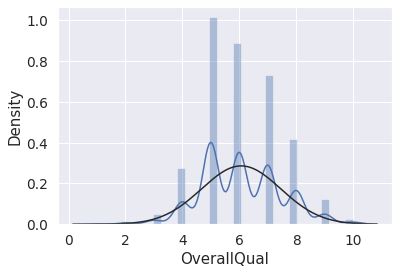

In [123]:
sns.distplot(df['OverallQual'] , fit=norm);

In [124]:
df["OverallQual"] = log1p(df["OverallQual"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


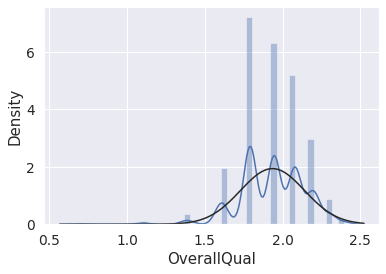

In [125]:
sns.distplot(df['OverallQual'] , fit=norm);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


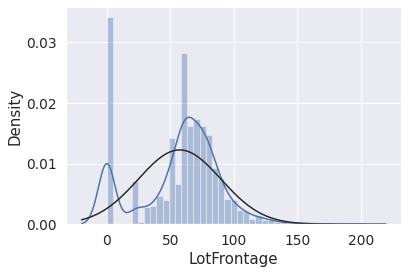

In [126]:
sns.distplot(df['LotFrontage'] , fit=norm);

In [127]:
df["LotFrontage"] = log1p(df["LotFrontage"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


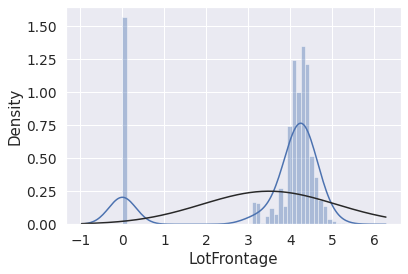

In [128]:
sns.distplot(df['LotFrontage'] , fit=norm);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


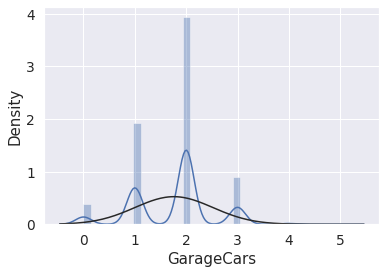

In [129]:
sns.distplot(df['GarageCars'] , fit=norm);

In [130]:
df["GarageCars"] = log1p(df["GarageCars"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


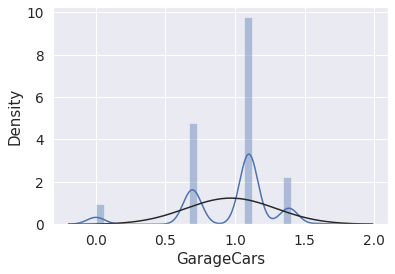

In [131]:
sns.distplot(df['GarageCars'] , fit=norm);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


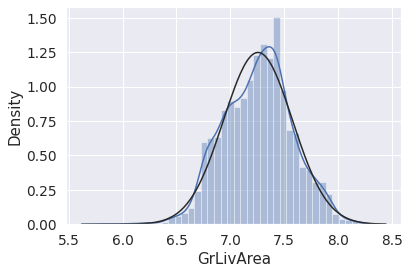

In [132]:
sns.distplot(df['GrLivArea'] , fit=norm);

In [133]:
df["GrLivArea"] = log1p(df["GrLivArea"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


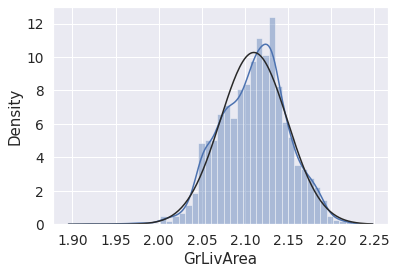

In [134]:
sns.distplot(df['GrLivArea'] , fit=norm);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


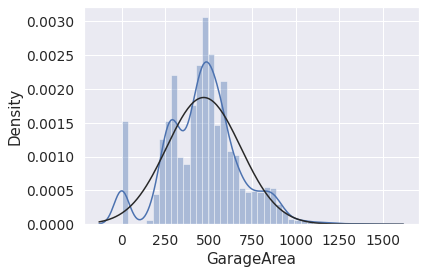

In [135]:
sns.distplot(df['GarageArea'] , fit=norm);

In [136]:
df["GarageArea"] = log1p(df["GarageArea"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


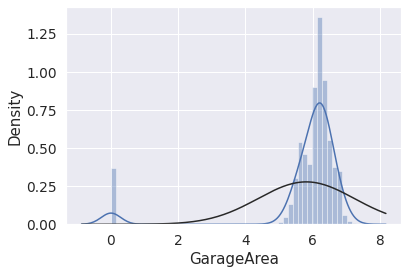

In [137]:
sns.distplot(df['GarageArea'] , fit=norm);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


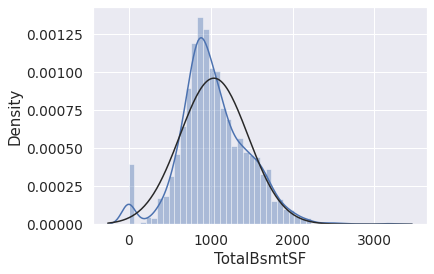

In [138]:
sns.distplot(df['TotalBsmtSF'] , fit=norm);

In [139]:
df["TotalBsmtSF"] = log1p(df["TotalBsmtSF"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


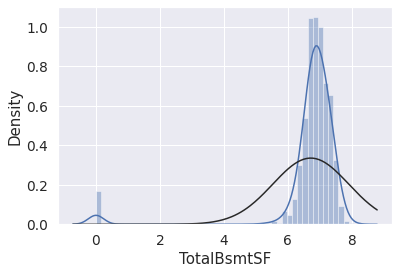

In [140]:
sns.distplot(df['TotalBsmtSF'] , fit=norm);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


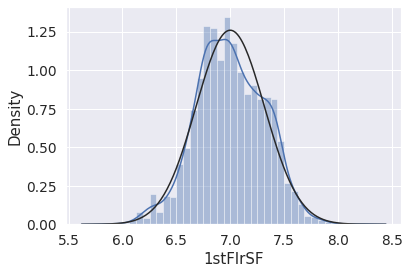

In [141]:
sns.distplot(df['1stFlrSF'] , fit=norm);

In [142]:
df["1stFlrSF"] = log1p(df["1stFlrSF"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


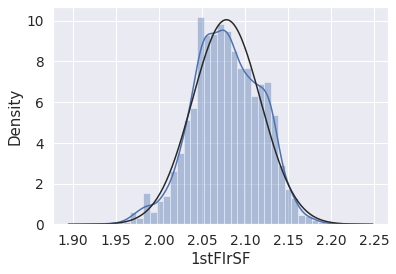

In [143]:
sns.distplot(df['1stFlrSF'] , fit=norm);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


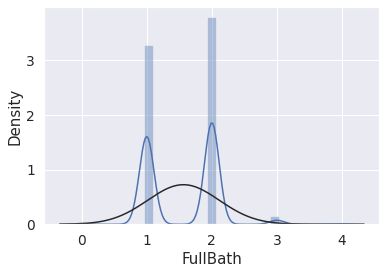

In [144]:
sns.distplot(df['FullBath'] , fit=norm);

In [145]:
df["FullBath"] = log1p(df["FullBath"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


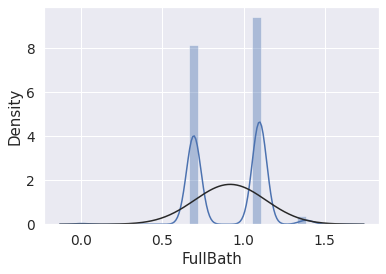

In [146]:
sns.distplot(df['FullBath'] , fit=norm);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


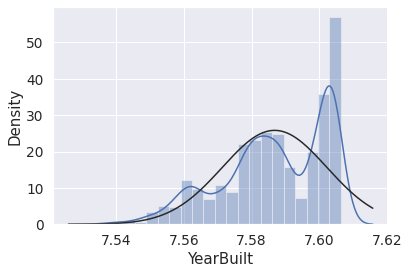

In [147]:
sns.distplot(df['YearBuilt'] , fit=norm);

In [148]:
df["YearBuilt"] = log1p(df["YearBuilt"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


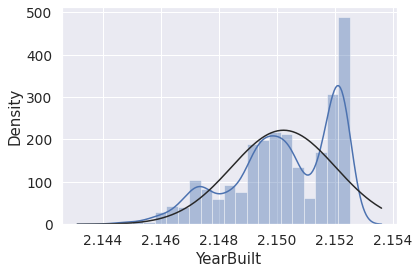

In [149]:
sns.distplot(df['YearBuilt'] , fit=norm);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


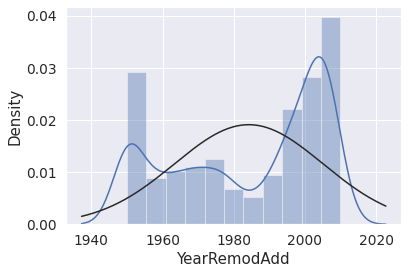

In [150]:
sns.distplot(df['YearRemodAdd'] , fit=norm);

In [151]:
df["YearRemodAdd"] = log1p(df["YearRemodAdd"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


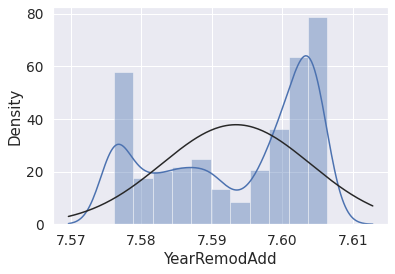

In [152]:
sns.distplot(df['YearRemodAdd'] , fit=norm);

In [153]:
df = get_dummies(df, columns=df_cat.columns) 

In [154]:
X_train =  df[:-ntest].drop(['SalePrice'], axis=1)
y_train =  df[:-ntest]['SalePrice']
X_test  =  df[:ntest].drop(['SalePrice'], axis=1)

In [155]:
X_train, X_testM, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [156]:
X_train.shape, X_testM.shape, y_train.shape, y_test.shape

((1123, 345), (281, 345), (1123,), (281,))

In [157]:


## Remove SalePrice from numeric_features to avoid scaling it
numerical_features = numerical_features.drop('SalePrice')

## Scaling all the numeric features using Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_testM[numerical_features]  = scaler.transform(X_testM[numerical_features])





In [158]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_testM)

print("Accuracy on Traing set   : ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set  : ",linear_reg.score(X_testM,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.9558474819007047
Accuracy on Testing set  :  0.8929746351019965
__________________________________________
		Error Table
Mean Absolute Error      :  0.09330908884109497
Mean Squared Error       :  0.018338508992616222
Root Mean Squared Error  :  0.135419751117096
R Squared Error          :  0.8929746351019965


In [159]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)
y_pred= RandomForest.predict(X_testM)

print("Accuracy on Traing set   : ",RandomForest.score(X_train,y_train))
print("Accuracy on Testing set  : ",RandomForest.score(X_testM,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.9808275916300158
Accuracy on Testing set  :  0.8831841849158436
__________________________________________
		Error Table
Mean Absolute Error      :  0.09319582244209483
Mean Squared Error       :  0.020016076352013985
Root Mean Squared Error  :  0.14147818330758274
R Squared Error          :  0.8831841849158436


In [160]:
XGB_model = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)

XGB_model.fit(X_train, y_train)
y_pred= XGB_model.predict(X_testM)

print("Accuracy on Traing set   : ",XGB_model.score(X_train,y_train))
print("Accuracy on Testing set  : ",XGB_model.score(X_testM,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.9585438397375156
Accuracy on Testing set  :  0.9160092828094976
__________________________________________
		Error Table
Mean Absolute Error      :  0.08374355355583439
Mean Squared  Error      :  0.014391583938650481
Root Mean Squared Error  :  0.1199649279525082
R Squared Error          :  0.9160092828094976


In [161]:
y_predict_XG=XGB_model.predict(X_test)

In [162]:
y_predict_XG=exp(y_predict_XG)

In [163]:
y_predict_XG.shape

(1459,)

In [164]:
Predictions = DataFrame(y_predict_XG, index=test_ID, columns=["SalePrice"])
Predictions.to_csv('submission_XGB_modelnew.csv', header=True, index_label='Id')